# Niesopolo Example
* Here we use the raw data of Niespolo et al. (2017) 
* We correct including the $^{39}$K(n,$\alpha$) decay and assess the change in age


In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import pandas as pd

In [2]:
"""
Plotting
"""
import matplotlib as mpl
mpl.rcParams['font.size'] = 14


In [3]:
"""
Niespolo Data
"""
"""
Total Fusion ACs and Mes4 data
"""

df_mes4 = pd.read_csv('Niespolo_Mes4_Ar_Data.csv')
df_acs = pd.read_csv('Niespolo_ACs_Ar_Data.csv')

<Figure size 1440x1440 with 0 Axes>

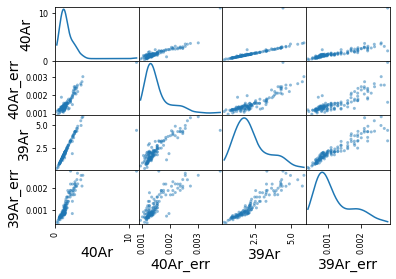

In [4]:
plt.figure(figsize = (20,20))
#mpl.rcParams['font.size'] = 10

pd.plotting.scatter_matrix(df_acs.iloc[:,1:5], diagonal = 'kde'); 

In [5]:
"""
Corrections Renne et al., (2015)
"""
# K
Ar40_Ar39_K = 7.30e-4;
Ar37_Ar39_K = 2.24e-4;
Ar38_Ar39_K = 1.196e-2;
# Ca
Ar39_Ar37_Ca = 7.02e-4;
Ar36_Ar37_Ca = 2.702e-2;

"""
K(n,a) Correction
"""
# K 
Ar36_Ar39_K = 0.8e-6;

In [6]:
"""
Alder Creek Data
"""
Ar36_data = df_acs['36Ar'].values
Ar37_data = df_acs['37Ar'].values
Ar38_data = df_acs['38Ar'].values
Ar39_data = df_acs['39Ar'].values
Ar40_data = df_acs['40Ar'].values

In [8]:
"""
Ar39_K
"""
Ar39_K = Ar39_data - (Ar39_Ar37_Ca * Ar37_data)

In [9]:
"""
Ar_Atmophere_Correction
Alder Creek
"""
Ar36_ca_corr = Ar37_data*(Ar36_Ar37_Ca)

Ar36_k_corr = Ar39_K*(Ar36_Ar39_K)

Text(0, 0.5, 'Frequency')

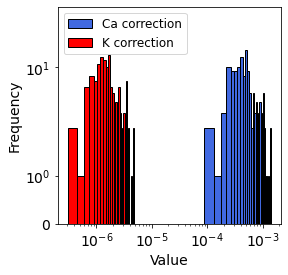

In [10]:
"""
Correction Comparison 
"""
from scipy.stats import gaussian_kde

plt.figure(figsize = (4,4))
plt.hist(Ar36_ca_corr, edgecolor = 'k', 
        facecolor = 'RoyalBlue',bins = 30, 
        label = 'Ca correction'); 
plt.hist(Ar36_k_corr, edgecolor = 'k', 
        facecolor = 'r', bins = 30, 
        label = 'K correction');
plt.xscale('log')
plt.legend(fontsize = 12, loc = 2)
plt.yscale('symlog')
plt.ylim(0, 50)
plt.xlabel('Value')
plt.ylabel('Frequency')

(-0.0025, 0.005)

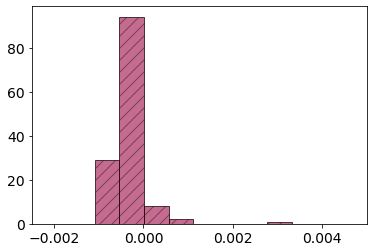

In [11]:
"""
Ar36 Atmosphere 
"""
Ar36_atm_ca_corr = Ar36_data - Ar36_ca_corr
Ar36_atm_ca_k_corr = Ar36_data - Ar36_ca_corr - Ar36_k_corr


plt.hist(Ar36_atm_ca_corr, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, bins = 50); 
plt.hist(Ar36_atm_ca_k_corr, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  bins =50);
plt.xlim(-0.0025, 0.005)
#plt.xscale('log')

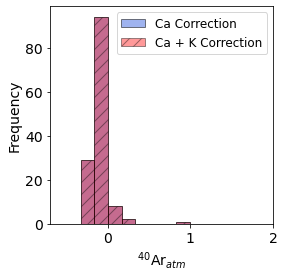

In [12]:
"""
Ar40 Atmopshere
"""
lee_2006_Ar40_Ar36 = 298.56

Ar40_atm_ca_corr = Ar36_atm_ca_corr  * lee_2006_Ar40_Ar36
Ar40_atm_ca_k_corr = Ar36_atm_ca_k_corr * lee_2006_Ar40_Ar36

plt.figure(figsize=(4,4))

plt.hist(Ar40_atm_ca_corr, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, 
         bins = 50, 
        label = 'Ca Correction'); 
plt.hist(Ar40_atm_ca_k_corr, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  
         bins = 50, 
        label = 'Ca + K Correction');
#plt.xscale('log')
plt.xlim(-0.7, 2)
plt.ylabel('Frequency')
plt.xlabel('$^{40}$Ar$_{atm}$')
plt.legend(fontsize= 12)

In [13]:
"""
Ar40_rad just Ca correction 
"""

Ar_rad_ca_corr = Ar40_data - Ar40_atm_ca_corr - (Ar39_K*(Ar40_Ar39_K)) 

In [14]:
"""
Ar40_rad Ca + K correction 
"""
Ar_rad_ca_k_corr = Ar40_data - Ar40_atm_ca_k_corr - (Ar39_K*Ar40_Ar39_K) 

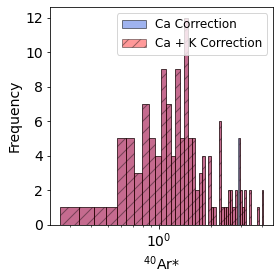

In [15]:
plt.figure(figsize=(4,4))

plt.hist(Ar_rad_ca_corr, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, 
         bins = 50, 
        label = 'Ca Correction'); 
plt.hist(Ar_rad_ca_k_corr, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  
         bins = 50, 
        label = 'Ca + K Correction');
plt.xscale('log')
#plt.xlim(-0.7, 2)
plt.ylabel('Frequency')
plt.xlabel('$^{40}$Ar*')
plt.legend(fontsize= 12)

In [16]:
"""
40Ar*/39ArK just ca
"""

Ar_rad_K_ca_corr = Ar_rad_ca_corr/Ar39_K

In [17]:
"""
40Ar*/39ArK Ca + K
"""

Ar_rad_K_ca_k_corr = Ar_rad_ca_k_corr/Ar39_K

In [18]:
from scipy.stats import gaussian_kde 

In [19]:
grid = np.linspace(0.65, 0.725, 100)

kde_ca_corr = gaussian_kde(Ar_rad_K_ca_corr, bw_method = 0.45)

kde_ca_corr_plot = kde_ca_corr.evaluate(grid)

kde_ca_k_corr = gaussian_kde(Ar_rad_K_ca_k_corr, bw_method = 0.45)

kde_ca_k_corr_plot = kde_ca_k_corr.evaluate(grid)

(0.0, 0.06)

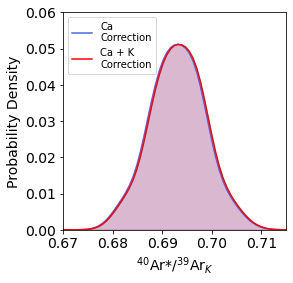

In [20]:
"""
Plot Comparison 
"""
plt.figure(figsize = (4,4))
plt.plot(grid, kde_ca_corr_plot/kde_ca_corr_plot.sum(), 
        color = 'RoyalBlue', 
        label = 'Ca\nCorrection')
plt.plot(grid, kde_ca_k_corr_plot/kde_ca_k_corr_plot.sum(), 
       color =  'Red', 
        label = 'Ca + K\nCorrection')
"""
Fill Between
"""
plt.fill_between(grid, kde_ca_k_corr_plot/kde_ca_k_corr_plot.sum(), 
                color = 'red', alpha = 0.2)
plt.fill_between(grid, kde_ca_corr_plot/kde_ca_corr_plot.sum(), 
        color = 'RoyalBlue', alpha = 0.2)

plt.xlabel('$^{40}$Ar*/$^{39}$Ar$_{K}$')
plt.ylabel('Probability Density')
plt.xlim(0.67, 0.715)
plt.legend(fontsize = 10, loc =2)
plt.ylim(0, 0.06)
#plt.xscale('symlog')

In [21]:
"""
Relative Differences
"""

rel_ratio = Ar_rad_K_ca_k_corr - Ar_rad_K_ca_corr
rel_value_1 = rel_ratio.mean()/Ar_rad_K_ca_k_corr.mean() * 100

In [23]:
grid2 = np.linspace(0, 0.05, 1000)

kde_rel_diff_corr = gaussian_kde(rel_ratio, bw_method = 1)

kde_rel_diff_plot = kde_ca_corr.evaluate(grid2)


In [24]:
"""
Mes4 Niespolo et al., (2017) Data
"""

Ar36_data_m = df_mes4['36Ar'].values
Ar37_data_m = df_mes4['37Ar'].values
Ar38_data_m = df_mes4['38Ar'].values
Ar39_data_m = df_mes4['39Ar'].values
Ar40_data_m = df_mes4['40Ar'].values

In [25]:
"""
Ar39_K
"""
Ar39_K_m = Ar39_data_m - (Ar39_Ar37_Ca * Ar37_data_m)

In [26]:
"""
Ar_Atmophere_Correction
Mes4
"""
Ar36_ca_corr_m = Ar37_data_m*(Ar36_Ar37_Ca)

Ar36_k_corr_m = Ar39_K_m*(Ar36_Ar39_K)

Text(0, 0.5, 'Frequency')

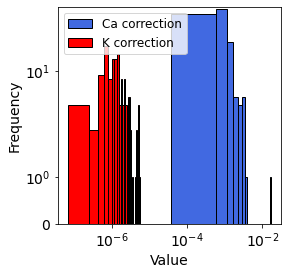

In [27]:
"""
Correction Comparison 
"""
from scipy.stats import gaussian_kde

plt.figure(figsize = (4,4))
plt.hist(Ar36_ca_corr_m, edgecolor = 'k', 
        facecolor = 'RoyalBlue',bins = 30, 
        label = 'Ca correction'); 
plt.hist(Ar36_k_corr_m, edgecolor = 'k', 
        facecolor = 'r', bins = 30, 
        label = 'K correction');
plt.xscale('log')
plt.legend(fontsize = 12, loc = 2)
plt.yscale('symlog')
#plt.ylim(0, 50)
plt.xlabel('Value')
plt.ylabel('Frequency')

(-0.004, 0.005)

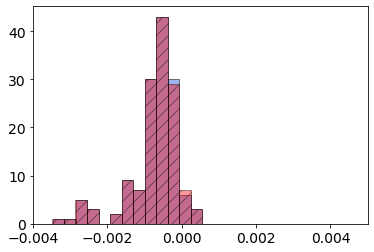

In [28]:
"""
Ar36 Atmosphere 
"""
Ar36_atm_ca_corr_m = Ar36_data_m - Ar36_ca_corr_m
Ar36_atm_ca_k_corr_m = Ar36_data_m - Ar36_ca_corr_m - Ar36_k_corr_m


plt.hist(Ar36_atm_ca_corr_m, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, bins = 50); 
plt.hist(Ar36_atm_ca_k_corr_m, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  bins =50);
plt.xlim(-0.004, 0.005)
#plt.xscale('log')

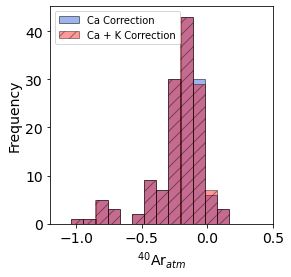

In [29]:
"""
Ar40 Atmopshere
"""
lee_2006_Ar40_Ar36 = 298.56

Ar40_atm_ca_corr_m = Ar36_atm_ca_corr_m * lee_2006_Ar40_Ar36
Ar40_atm_ca_k_corr_m = Ar36_atm_ca_k_corr_m * lee_2006_Ar40_Ar36

plt.figure(figsize=(4,4))

plt.hist(Ar40_atm_ca_corr_m, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, 
         bins = 50, 
        label = 'Ca Correction'); 
plt.hist(Ar40_atm_ca_k_corr_m, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  
         bins = 50, 
        label = 'Ca + K Correction');
#plt.xscale('log')
plt.xlim(-1.2, 0.5)
plt.ylabel('Frequency')
plt.xlabel('$^{40}$Ar$_{atm}$')
plt.legend(fontsize= 10, loc = 2)

In [30]:
"""
Ar40_rad just Ca correction 
"""

Ar_rad_ca_corr_m = Ar40_data_m - Ar40_atm_ca_corr_m - (Ar39_K_m*(Ar40_Ar39_K)) 

In [31]:
"""
Ar40_rad Ca + K correction 
"""
Ar_rad_ca_k_corr_m = Ar40_data_m - Ar40_atm_ca_k_corr_m - (Ar39_K_m*Ar40_Ar39_K) 

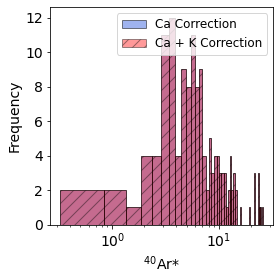

In [32]:
plt.figure(figsize=(4,4))

plt.hist(Ar_rad_ca_corr_m, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, 
         bins = 50, 
        label = 'Ca Correction'); 
plt.hist(Ar_rad_ca_k_corr_m, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  
         bins = 50, 
        label = 'Ca + K Correction');
plt.xscale('log')
#plt.xlim(-0.7, 2)
plt.ylabel('Frequency')
plt.xlabel('$^{40}$Ar*')
plt.legend(fontsize= 12)

In [33]:
"""
40Ar*/39ArK just ca
"""

Ar_rad_K_ca_corr_m = Ar_rad_ca_corr_m/Ar39_K_m

In [34]:
"""
40Ar*/39ArK Ca + K 
"""

Ar_rad_K_ca_k_corr_m = Ar_rad_ca_k_corr_m/Ar39_K_m

In [35]:
grid = np.linspace(0, 7, 100)

kde_ca_corr_m = gaussian_kde(Ar_rad_K_ca_corr_m, bw_method = 0.2)

kde_ca_corr_m_plot = kde_ca_corr_m.evaluate(grid)

kde_ca_k_corr_m = gaussian_kde(Ar_rad_K_ca_k_corr_m, bw_method = 0.2)

kde_ca_k_corr_m_plot = kde_ca_k_corr_m.evaluate(grid)

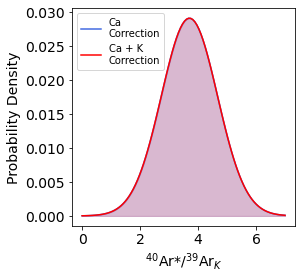

In [36]:
"""
Plot Comparison 
"""
plt.figure(figsize = (4,4))
plt.plot(grid, kde_ca_corr_m_plot/kde_ca_corr_m_plot.sum(), 
        color = 'RoyalBlue', 
        label = 'Ca\nCorrection')
plt.plot(grid, kde_ca_k_corr_m_plot/kde_ca_k_corr_m_plot.sum(), 
       color =  'Red', 
        label = 'Ca + K\nCorrection')
"""
Fill Between
"""
plt.fill_between(grid, kde_ca_k_corr_m_plot/kde_ca_k_corr_m_plot.sum(), 
                color = 'red', alpha = 0.2)
plt.fill_between(grid, kde_ca_corr_m_plot/kde_ca_corr_m_plot.sum(), 
        color = 'RoyalBlue', alpha = 0.2)

plt.xlabel('$^{40}$Ar*/$^{39}$Ar$_{K}$')
plt.ylabel('Probability Density')
#plt.xlim(0.67, 0.72)
plt.legend(fontsize = 10, loc =2)
#plt.ylim(0, )

In [37]:
"""
Relative Differences
"""

rel_ratio_m = Ar_rad_K_ca_k_corr_m - Ar_rad_K_ca_corr_m
rel_value_2 = rel_ratio_m.mean()/Ar_rad_K_ca_k_corr.mean() * 100

In [38]:
print(rel_value_1, rel_value_2)

0.03445045001612432 0.034450450016135094


In [39]:
"""
R value comparison
"""
r_acs_mes4_niespolo = 0.174099
r_acs_mes4_niespolo_err = 0.000067

r_acs_mes4_kna = 0.174099 * 1*((1 + rel_value_1)/(1 + rel_value_2))

In [40]:
r_acs_mes4_kna  = Ar_rad_K_ca_k_corr.mean()/Ar_rad_K_ca_k_corr_m.mean()
print(r_acs_mes4_kna)

0.16866866998037258


In [41]:
r_acs_mes4 = Ar_rad_K_ca_corr.mean()/Ar_rad_K_ca_corr_m.mean()
r_acs_mes4

0.1686203609073731

In [42]:
(r_acs_mes4_kna/r_acs_mes4)

1.000286496083507

In [43]:
"""
Rel Difference
"""

model_val= (r_acs_mes4_kna/r_acs_mes4)*r_acs_mes4_niespolo
model_val_err = (r_acs_mes4_kna/r_acs_mes4)*r_acs_mes4_niespolo_err

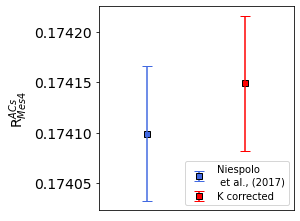

In [44]:
"""
R plot difference 
"""
plt.figure(figsize = (4.4,3.3))
plt.errorbar(0.905, y = r_acs_mes4_niespolo, yerr =r_acs_mes4_niespolo_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'Niespolo\n et al., (2017)', 
            color= 'RoyalBlue', 
            markeredgecolor = 'k')


plt.errorbar(0.915, y = model_val, 
             yerr = model_val_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'K corrected', 
            color = 'r', 
            markeredgecolor = 'k')

plt.legend(fontsize = 10, loc = 4)
plt.xticks([])
plt.xlim(0.9, 0.92)
plt.ylabel('R$^{ACs}_{Mes4}$')
plt.tight_layout()
#plt.savefig('/Users/jackcarter/Desktop/Comparison1.pdf')

In [45]:
0.041678* (r_acs_mes4_kna/r_acs_mes4)

0.0416899405837684

In [46]:
"""
Fish Canyon Sanidine
"""

df_fcs = pd.read_csv("Niespolo_FCs_Raw_Stepheat.csv")


In [47]:
"""
Fish Canyon Data
"""
Ar36_data_f = df_fcs['36Ar'].values
Ar37_data_f = df_fcs['37Ar'].values
Ar38_data_f = df_fcs['38Ar'].values
Ar39_data_f = df_fcs['39Ar'].values
Ar40_data_f = df_fcs['40Ar'].values

In [48]:
"""
Ar39_K
"""
Ar39_K_f = Ar39_data_f - (Ar39_Ar37_Ca * Ar37_data_f)

In [49]:
"""
Ar_Atmophere_Correction
Alder Creek
"""
Ar36_ca_corr_f = Ar37_data_f*(Ar36_Ar37_Ca)

Ar36_k_corr_f = Ar39_K_f*(Ar36_Ar39_K)

Text(0, 0.5, 'Frequency')

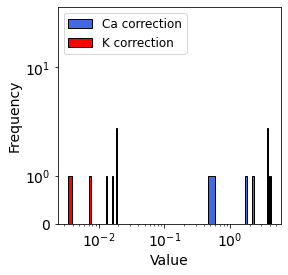

In [50]:
"""
Correction Comparison 
"""
from scipy.stats import gaussian_kde

plt.figure(figsize = (4,4))
plt.hist(Ar36_ca_corr_f, edgecolor = 'k', 
        facecolor = 'RoyalBlue',bins = 30, 
        label = 'Ca correction'); 
plt.hist(Ar36_k_corr_f, edgecolor = 'k', 
        facecolor = 'r', bins = 30, 
        label = 'K correction');
plt.xscale('log')
plt.legend(fontsize = 12, loc = 2)
plt.yscale('symlog')
plt.ylim(0, 50)
plt.xlabel('Value')
plt.ylabel('Frequency')

In [51]:
Ar36_data_f


array([ 1.511479 , -0.0475074,  3.085618 ,  5.76977  ,  1.958051 ,
       -0.3245338,  2.058246 ])

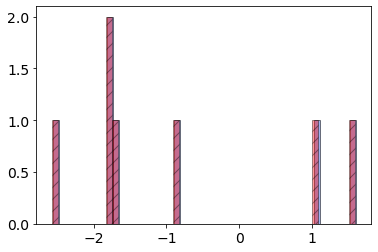

In [52]:
"""
Ar36 Atmosphere 
"""
Ar36_atm_ca_corr_f = Ar36_data_f - Ar36_ca_corr_f
Ar36_atm_ca_k_corr_f = Ar36_data_f - Ar36_ca_corr_f - Ar36_k_corr_f


plt.hist(Ar36_atm_ca_corr_f, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, bins = 50); 
plt.hist(Ar36_atm_ca_k_corr_f, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  bins =50);
#plt.xlim(-0.0025, 0.005)
#plt.xscale('log')

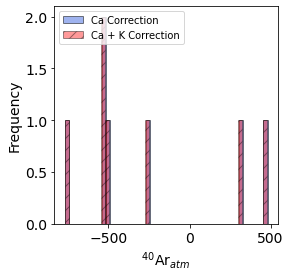

In [53]:
"""
Ar40 Atmopshere
"""
lee_2006_Ar40_Ar36 = 298.56

Ar40_atm_ca_corr_f = Ar36_atm_ca_corr_f * lee_2006_Ar40_Ar36
Ar40_atm_ca_k_corr_f = Ar36_atm_ca_k_corr_f * lee_2006_Ar40_Ar36

plt.figure(figsize=(4,4))

plt.hist(Ar40_atm_ca_corr_f, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, 
         bins = 50, 
        label = 'Ca Correction'); 
plt.hist(Ar40_atm_ca_k_corr_f, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  
         bins = 50, 
        label = 'Ca + K Correction');
#plt.xscale('log')
#plt.xlim(-1.2, 0.5)
plt.ylabel('Frequency')
plt.xlabel('$^{40}$Ar$_{atm}$')
plt.legend(fontsize= 10, loc = 2)

In [54]:
"""
Ar40_rad just Ca correction 
"""


Ar_rad_ca_corr_f = Ar40_data_f - Ar40_atm_ca_corr_f - (Ar39_K_f*(Ar40_Ar39_K)) 




In [55]:
"""
Ar40_rad Ca + K correction 
"""
Ar_rad_ca_k_corr_f = Ar40_data_f - Ar40_atm_ca_k_corr_f - (Ar39_K_f*Ar40_Ar39_K) 


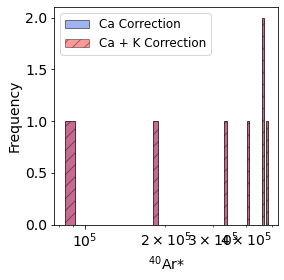

In [56]:
plt.figure(figsize=(4,4))

plt.hist(Ar_rad_ca_corr_f, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, 
         bins = 50, 
        label = 'Ca Correction'); 
plt.hist(Ar_rad_ca_k_corr_f, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  
         bins = 50, 
        label = 'Ca + K Correction');
plt.xscale('log')
#plt.xlim(-0.7, 2)
plt.ylabel('Frequency')
plt.xlabel('$^{40}$Ar*')
plt.legend(fontsize= 12)

In [57]:

"""
40Ar*/39ArK just ca
"""

Ar_rad_K_ca_corr_f = Ar_rad_ca_corr_f/Ar39_K_f

In [58]:
"""
40Ar*/39ArK Ca + K 
"""

Ar_rad_K_ca_k_corr_f = Ar_rad_ca_k_corr_f/Ar39_K_f

In [59]:
R_mes4_fcs = Ar_rad_K_ca_corr_m.mean()/Ar_rad_K_ca_corr_f.mean()

R_mes4_fcs_k = Ar_rad_K_ca_k_corr_m.mean()/Ar_rad_K_ca_k_corr_f.mean()

In [60]:
((R_mes4_fcs_k/R_mes4_fcs) * 0.23960) * 0.1741925

0.04173845205628189

In [61]:
grid = np.linspace(17, 25, 100)

kde_ca_corr_f = gaussian_kde(Ar_rad_K_ca_corr_f, bw_method = 1)

kde_ca_corr_f_plot = kde_ca_corr_f.evaluate(grid)

kde_ca_k_corr_f = gaussian_kde(Ar_rad_K_ca_k_corr_f, bw_method = 1)

kde_ca_k_corr_f_plot = kde_ca_k_corr_f.evaluate(grid)

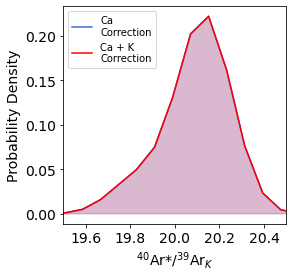

In [62]:
"""
Plot Comparison 
"""
plt.figure(figsize = (4,4))
plt.plot(grid, kde_ca_corr_f_plot/kde_ca_corr_f_plot.sum(), 
        color = 'RoyalBlue', 
        label = 'Ca\nCorrection')
plt.plot(grid, kde_ca_k_corr_f_plot/kde_ca_k_corr_f_plot.sum(), 
       color =  'Red', 
        label = 'Ca + K\nCorrection')
"""
Fill Between
"""
plt.fill_between(grid, kde_ca_k_corr_f_plot/kde_ca_k_corr_f_plot.sum(), 
                color = 'red', alpha = 0.2)
plt.fill_between(grid, kde_ca_corr_f_plot/kde_ca_corr_f_plot.sum(), 
        color = 'RoyalBlue', alpha = 0.2)

plt.xlabel('$^{40}$Ar*/$^{39}$Ar$_{K}$')
plt.ylabel('Probability Density')
plt.xlim(19.5, 20.5)
plt.legend(fontsize = 10, loc =2)
#plt.ylim(0, )

In [63]:
"""
Relative Differences
"""

rel_ratio_f = Ar_rad_K_ca_k_corr_f - Ar_rad_K_ca_corr_f
rel_value_3 = rel_ratio_f.mean()/Ar_rad_K_ca_k_corr_f.mean() * 100

In [64]:
print(rel_value_1, rel_value_2, rel_value_3);

0.03445045001612432 0.034450450016135094 0.0011889940782214084


In [65]:
r_acs_fcs_kna  = Ar_rad_K_ca_k_corr.mean()/Ar_rad_K_ca_k_corr_f.mean()


In [66]:
r_acs_fcs_kna

0.03451316536276686

In [67]:
r_acs_fcs = Ar_rad_K_ca_corr.mean()/Ar_rad_K_ca_corr_f.mean()
r_acs_fcs

0.03450168564498377

In [68]:
(r_acs_fcs_kna/r_acs_fcs) 

1.0003327291860813

In [69]:
"""
Niespolo et al., (2017)
"""

r_acs_fcs_niespolo = 0.041702
r_acs_fcs_niespolo_err = 0.000014

model_r_acs_fcs = r_acs_fcs_niespolo*(r_acs_fcs_kna/r_acs_fcs) 
model_r_acs_fcs_err = r_acs_fcs_niespolo_err*(r_acs_fcs_kna/r_acs_fcs) 

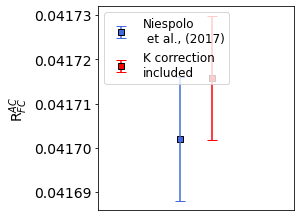

In [70]:
"""
R plot difference 
"""
plt.figure(figsize = (4.4,3.3))
plt.errorbar(0.905, y = r_acs_fcs_niespolo ,
             yerr =r_acs_fcs_niespolo_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'Niespolo\n et al., (2017)', 
            color= 'RoyalBlue', 
            markeredgecolor = 'k')


plt.errorbar(0.915, y = model_r_acs_fcs, 
             yerr = model_r_acs_fcs_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'K correction\nincluded', 
            color = 'r', 
            markeredgecolor = 'k')

plt.legend(fontsize = 12, loc = 2)
plt.xticks([])
plt.xlim(0.88, 0.94)
plt.ylabel('R$^{AC}_{FC}$')
plt.tight_layout()

In [71]:
"""
A1 tephra
"""

df_a1 = pd.read_csv("Niespolo_A1_Raw_Stepheat.csv")

In [72]:
"""
A1_data
"""
Ar36_data_a1 = df_a1['36Ar'].values
Ar37_data_a1 = df_a1['37Ar'].values
Ar38_data_a1 = df_a1['38Ar'].values
Ar39_data_a1 = df_a1['39Ar'].values
Ar40_data_a1 = df_a1['40Ar'].values

In [73]:
"""
Ar39_K
"""
Ar39_K_a1 = Ar39_data_a1 - (Ar39_Ar37_Ca * Ar37_data_a1)

In [74]:
"""
Ar_Atmophere_Correction
Alder Creek
"""
Ar36_ca_corr_a1 = Ar37_data_a1*(Ar36_Ar37_Ca)

Ar36_k_corr_a1 = Ar39_K_a1*(Ar36_Ar39_K)

Text(0, 0.5, 'Frequency')

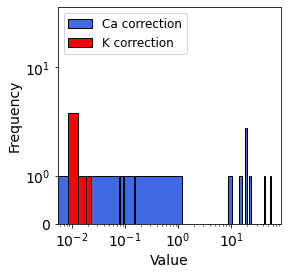

In [75]:
"""
Correction Comparison 
"""
from scipy.stats import gaussian_kde

plt.figure(figsize = (4,4))
plt.hist(Ar36_ca_corr_a1, edgecolor = 'k', 
        facecolor = 'RoyalBlue',bins = 30, 
        label = 'Ca correction'); 
plt.hist(Ar36_k_corr_a1, edgecolor = 'k', 
        facecolor = 'r', bins = 30, 
        label = 'K correction');
plt.xscale('log')
plt.legend(fontsize = 12, loc = 2)
plt.yscale('symlog')
plt.ylim(0, 50)
plt.xlabel('Value')
plt.ylabel('Frequency')

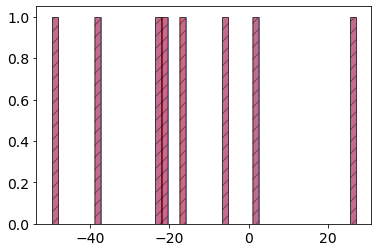

In [76]:
"""
Ar36 Atmosphere 
"""
Ar36_atm_ca_corr_a1 = Ar36_data_a1 - Ar36_ca_corr_a1
Ar36_atm_ca_k_corr_a1 = Ar36_data_a1 - Ar36_ca_corr_a1 - Ar36_k_corr_a1


plt.hist(Ar36_atm_ca_corr_a1, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, bins = 50); 
plt.hist(Ar36_atm_ca_k_corr_a1, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  bins =50);
#plt.xlim(-0.0025, 0.005)
#plt.xscale('log')

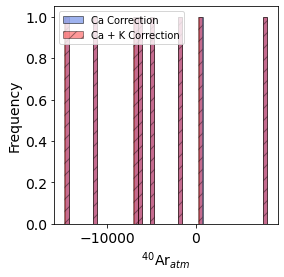

In [77]:
"""
Ar40 Atmopshere
"""
lee_2006_Ar40_Ar36 = 298.56

Ar40_atm_ca_corr_a1 = Ar36_atm_ca_corr_a1 * lee_2006_Ar40_Ar36
Ar40_atm_ca_k_corr_a1 = Ar36_atm_ca_k_corr_a1 * lee_2006_Ar40_Ar36

plt.figure(figsize=(4,4))

plt.hist(Ar40_atm_ca_corr_a1, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, 
         bins = 50, 
        label = 'Ca Correction'); 
plt.hist(Ar40_atm_ca_k_corr_a1, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  
         bins = 50, 
        label = 'Ca + K Correction');
#plt.xscale('log')
#plt.xlim(-1.2, 0.5)
plt.ylabel('Frequency')
plt.xlabel('$^{40}$Ar$_{atm}$')
plt.legend(fontsize= 10, loc = 2)

In [78]:
"""
Ar40_rad just Ca correction 
"""


Ar_rad_ca_corr_a1 = Ar40_data_a1 - Ar40_atm_ca_corr_a1 - (Ar39_K_a1*(Ar40_Ar39_K)) 




In [79]:
"""
Ar40_rad Ca + K correction 
"""
Ar_rad_ca_k_corr_a1 = Ar40_data_a1 - Ar40_atm_ca_k_corr_a1 - (Ar39_K_a1*Ar40_Ar39_K) 


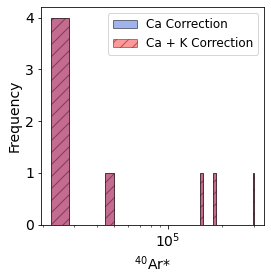

In [80]:
plt.figure(figsize=(4,4))

plt.hist(Ar_rad_ca_corr_a1, edgecolor = 'k', 
        facecolor = 'RoyalBlue', alpha = 0.5, 
         bins = 50, 
        label = 'Ca Correction'); 
plt.hist(Ar_rad_ca_k_corr_a1, edgecolor = 'k', 
        facecolor = 'r', hatch = '//', alpha = 0.4,  
         bins = 50, 
        label = 'Ca + K Correction');
plt.xscale('log')
#plt.xlim(-0.7, 2)
plt.ylabel('Frequency')
plt.xlabel('$^{40}$Ar*')
plt.legend(fontsize= 12)

In [81]:

"""
40Ar*/39ArK just ca
"""

Ar_rad_K_ca_corr_a1 = Ar_rad_ca_corr_a1/Ar39_K_a1

In [82]:
r_a_f_1 = Ar_rad_K_ca_corr_a1.mean()/Ar_rad_K_ca_corr_f.mean()

In [83]:
r_a_f_2 = Ar_rad_K_ca_k_corr_a1.mean()/Ar_rad_K_ca_k_corr_f.mean()

NameError: name 'Ar_rad_K_ca_k_corr_a1' is not defined

In [84]:
(r_a_f_2/r_a_f_1) 

NameError: name 'r_a_f_2' is not defined

In [85]:
0.244686* (r_a_f_2/r_a_f_1) * 1.707

NameError: name 'r_a_f_2' is not defined

In [86]:
"""
40Ar*/39ArK Ca + K 
"""

Ar_rad_K_ca_k_corr_a1 = Ar_rad_ca_k_corr_a1/Ar39_K_a1

In [87]:
grid = np.linspace(0, 5, 100)

kde_ca_corr_a1 = gaussian_kde(Ar_rad_K_ca_corr_a1, bw_method = 1)

kde_ca_corr_a1_plot = kde_ca_corr_a1.evaluate(grid)

kde_ca_k_corr_a1 = gaussian_kde(Ar_rad_K_ca_k_corr_a1, bw_method = 1)

kde_ca_k_corr_a1_plot = kde_ca_k_corr_a1.evaluate(grid)

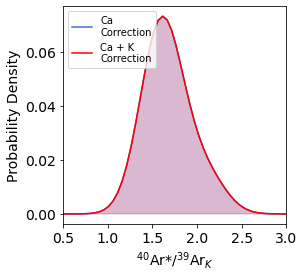

In [88]:
"""
Plot Comparison 
"""
plt.figure(figsize = (4,4))
plt.plot(grid, kde_ca_corr_a1_plot/kde_ca_corr_a1_plot.sum(), 
        color = 'RoyalBlue', 
        label = 'Ca\nCorrection')
plt.plot(grid, kde_ca_k_corr_a1_plot/kde_ca_k_corr_a1_plot.sum(), 
       color =  'Red', 
        label = 'Ca + K\nCorrection')
"""
Fill Between
"""
plt.fill_between(grid, kde_ca_k_corr_a1_plot/kde_ca_k_corr_a1_plot.sum(), 
                color = 'red', alpha = 0.2)
plt.fill_between(grid, kde_ca_corr_a1_plot/kde_ca_corr_a1_plot.sum(), 
        color = 'RoyalBlue', alpha = 0.2)

plt.xlabel('$^{40}$Ar*/$^{39}$Ar$_{K}$')
plt.ylabel('Probability Density')
plt.xlim(0.5, 3)
plt.legend(fontsize = 10, loc =2)
#plt.ylim(0, )

In [89]:
"""
Relative Differences
"""

rel_ratio_a1 = Ar_rad_K_ca_k_corr_a1 - Ar_rad_K_ca_corr_a1
rel_value_4 = rel_ratio_a1.mean()/Ar_rad_K_ca_k_corr_a1.mean() * 100

In [90]:
print(rel_value_1, rel_value_2, rel_value_3, rel_value_4);

0.03445045001612432 0.034450450016135094 0.0011889940782214084 0.014191421771318798


In [91]:
r_acs_a1_kna  = Ar_rad_K_ca_k_corr.mean()/Ar_rad_K_ca_k_corr_a1.mean()


In [92]:
r_acs_a1 = Ar_rad_K_ca_corr.mean()/Ar_rad_K_ca_corr_a1.mean()
r_acs_a1

0.4118537294133368

In [94]:
(r_acs_a1_kna/r_acs_a1) 

1.0002026600997644

In [95]:
"""
Niespolo et al., (2017)
"""

r_acs_a1_niespolo = 0.170639
r_acs_a1_niespolo_err = 0.000302

model_r_acs_a1 = r_acs_a1_niespolo*(r_acs_a1_kna/r_acs_a1) 
model_r_acs_a1_err = r_acs_a1_niespolo_err*(r_acs_a1_kna/r_acs_a1) 

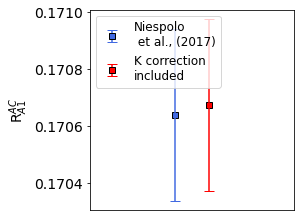

In [96]:
"""
R plot difference 
"""
plt.figure(figsize = (4.4,3.3))
plt.errorbar(0.905, y = r_acs_a1_niespolo ,
             yerr = r_acs_a1_niespolo_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'Niespolo\n et al., (2017)', 
            color= 'RoyalBlue', 
            markeredgecolor = 'k')


plt.errorbar(0.915, y = model_r_acs_a1, 
             yerr = model_r_acs_a1_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'K correction\nincluded', 
            color = 'r', 
            markeredgecolor = 'k')

plt.legend(fontsize = 12, loc = 2)
plt.xticks([])
plt.xlim(0.88, 0.94)
plt.ylabel('R$^{AC}_{A1}$')
plt.tight_layout()

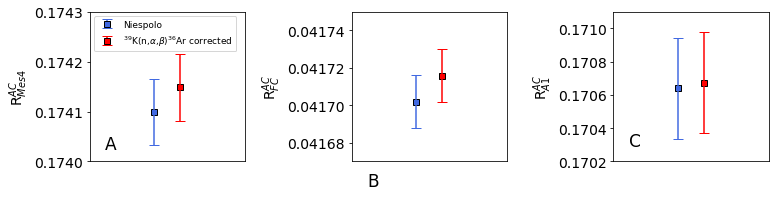

In [97]:
fig, ax = plt.subplots(1, 3, figsize = (11,3))

"""
0
"""

ax[0].errorbar(0.905, y = r_acs_mes4_niespolo, yerr =r_acs_mes4_niespolo_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'Niespolo', 
            color= 'RoyalBlue', 
            markeredgecolor = 'k')


ax[0].errorbar(0.915, y = model_val, 
             yerr = model_val_err, 
            fmt = 's', barsabove = True, capsize = 5, 
label = r'$^{39}$K(n,$\alpha$,$\beta$)$^{36}$Ar corrected', 
               color = 'r', 
            markeredgecolor = 'k')

ax[0].set_xticks([])
ax[0].set_xlim(0.88, 0.94)
ax[0].set_ylabel('R$^{AC}_{Mes4}$')

"""
1
"""
ax[1].errorbar(0.905, y = r_acs_fcs_niespolo ,
             yerr =r_acs_fcs_niespolo_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'Niespolo\n et al., (2017)', 
            color= 'RoyalBlue', 
            markeredgecolor = 'k')


ax[1].errorbar(0.915, y = model_r_acs_fcs, 
             yerr = model_r_acs_fcs_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'K correction\nincluded', 
            color = 'r', 
            markeredgecolor = 'k')

ax[1].set_xticks([])
ax[1].set_xlim(0.88, 0.94)
ax[1].set_ylabel('R$^{AC}_{FC}$')

"""
2
"""
ax[2].errorbar(0.905, y = r_acs_a1_niespolo ,
             yerr = r_acs_a1_niespolo_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'Niespolo', 
            color= 'RoyalBlue', 
            markeredgecolor = 'k')


ax[2].errorbar(0.915, y = model_r_acs_a1, 
             yerr = model_r_acs_a1_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            color = 'r', 
            markeredgecolor = 'k')

ax[2].set_xticks([])
ax[2].set_xlim(0.88, 0.94)
ax[2].set_ylabel('R$^{AC}_{A1}$')

ax[0].set_ylim(0.174, 0.1743)
ax[1].set_ylim(0.04167, 0.04175)
ax[2].set_ylim(0.1702, 0.1711)

ax[0].text(0.886, 0.174025, 'A', fontsize = 17)
ax[1].text(0.886, 0.041657, 'B', fontsize = 17)
ax[2].text(0.886, 0.17029, 'C', fontsize = 17)
ax[0].legend(fontsize = 9, loc = 2)

plt.tight_layout()
plt.savefig('/Users/jackcarter/Desktop/Neutron_Irradiation_Paper/Supplement/Niespolo_R_Value_corr.pdf')

In [98]:
model_val_r_acs_mes4 = (r_acs_mes4_kna/r_acs_mes4)*r_acs_mes4_niespolo
model_val_r_acs_mes4_err = (r_acs_mes4_kna/r_acs_mes4)*r_acs_mes4_niespolo_err

In [99]:
model_r_acs_fcs = r_acs_fcs_niespolo*(r_acs_fcs_kna/r_acs_fcs) 
model_r_acs_fcs_err = r_acs_fcs_niespolo_err*(r_acs_fcs_kna/r_acs_fcs) 

In [100]:
model_r_acs_fcs

0.04171587547251796

In [101]:
model_r_acs_a1 = r_acs_a1_niespolo*(r_acs_a1_kna/r_acs_a1) 
model_r_acs_a1_err = r_acs_a1_niespolo_err*(r_acs_a1_kna/r_acs_a1) 

In [102]:
print('R', model_r_acs_a1, 
    '+/-', model_r_acs_a1_err)

R 0.17067358171676372 +/- 0.0003020612033501289


In [103]:
print('R', model_val_r_acs_mes4, 
    '+/-', model_val_r_acs_mes4_err)

R 0.17414887868164247 +/- 6.701919523759497e-05


In [104]:
print('R', model_r_acs_fcs, 
    '+/-', model_r_acs_fcs_err)

R 0.04171587547251796 +/- 1.4004658208605138e-05


In [105]:
print(model_r_acs_a1, model_r_acs_a1_err)

0.17067358171676372 0.0003020612033501289


In [106]:
print(model_r_acs_fcs, model_r_acs_fcs_err)

0.04171587547251796 1.4004658208605138e-05


In [107]:
print(model_val_r_acs_mes4, model_val_r_acs_mes4_err)

0.17414887868164247 6.701919523759497e-05


In [108]:
"""
R_FCS_ACs
"""

turrin_r = 0.04229
turrin_r_err = 0.00021

Renne_1998_r = 0.04229
Renne_1998_r_err = 0.00006

Nomade = 0.0423
Nomade_err = 0.0006

Coble = 0.04180
Coble_err = 0.00021

Mcd_r = 0.04189
Mcd_r_err  = 0.0006

Rivera_r = 0.04175
Rivera_r_err = 0.00003

P_m_r = 0.04169
P_m_r_err = 0.00002
Singer_r = 0.04185 
Singer_r_err = 0.00011

Jicha_r = 0.04176
Jicha_r_err = 0.00004

Niespolo_r = r_acs_fcs_niespolo
Niespolo_r_err = r_acs_fcs_niespolo_err

In [109]:
label_r_value = ['Turrin et al., (1994)',
        'Renne et al., (1998)', 
        'Nomade et al., (2005)', 
        'Coble et al., (2011)', 
        'McDougall et al., (2012)', 
        'Rivera et al., (2013)', 
         'Phillips and Matchan (2013)',
        'Singer (2014)', 
        'Jicha et al., (2016)', 
        'Niespolo et al., (2017)']


In [110]:
R_acs_fcs_all = np.array([turrin_r , 
                         Renne_1998_r , 
                         Nomade, 
                         Coble, 
                         Mcd_r, 
                        Rivera_r, 
                         P_m_r,
                         Singer_r,
                         Jicha_r, 
                         Niespolo_r])

R_acs_fcs_all_err = np.array([turrin_r_err , 
                         Renne_1998_r_err , 
                         Nomade_err, 
                         Coble_err, 
                         Mcd_r_err, 
                        Rivera_r_err, 
                         P_m_r_err,
                         Singer_r_err,
                         Jicha_r_err, 
                         Niespolo_r_err])

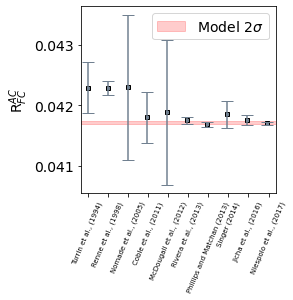

In [111]:
fig, ax = plt.subplots(1,1, figsize = (4.4,4.4))
for i in range(0, len(R_acs_fcs_all)): 
    plt.errorbar(i*1.1, y = R_acs_fcs_all[i], 
                yerr =R_acs_fcs_all_err[i]*2, 
                color = 'slategrey', 
                fmt = 's', 
                barsabove = True, 
                capsize = 6, 
                markeredgecolor = 'k',
                ms = 4)
    

ax.set_xticks(np.linspace(0, R_acs_fcs_all.shape[0],
                       R_acs_fcs_all.shape[0]))
ax.set_xticklabels(label_r_value, rotation = 67, 
                   fontsize = 7)

plt.axhspan(model_r_acs_fcs - 2*model_r_acs_fcs_err,
            model_r_acs_fcs + 2*model_r_acs_fcs_err, 
            color='r', alpha = 0.2, 
           label = 'Model 2$\sigma$')
plt.xlim(-0.4, 10.4)
plt.ylabel('R$^{AC}_{FC}$')
plt.legend()
plt.tight_layout()


In [112]:
"""
Alder Creek Age 
"""

kuiper_age = 6.791e6
lamb_t = 5.463e-10
model_acs_mes4 = 0.1741925

t_acs_age = (1/lamb_t)*np.log((np.exp(lamb_t*kuiper_age) -1)*model_acs_mes4 + 1)

t_acs_age/1e6

1.1847548062028033

In [113]:
0.00098*1.0005

0.0009804899999999999

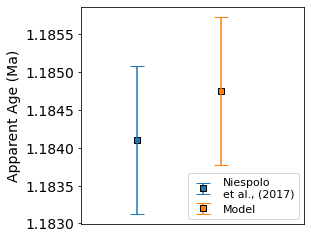

In [114]:
plt.figure(figsize = (4,4))
plt.errorbar(1.5,y =  1.1841, yerr = 0.00098, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Niespolo\net al., (2017)', 
            markeredgecolor = 'k')

plt.errorbar(1.65, y = t_acs_age/1e6, yerr = 0.00098*1.0005, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Model', 
            markeredgecolor = 'k')

plt.xlim(1.4, 1.8)
plt.xticks([])
plt.ylabel('Apparent Age (Ma)')
plt.legend(loc = 4, fontsize = 11)

In [115]:
"""
MBB Age 
"""

kuiper_age_mes4 = 6.791e6
kuiper_age_a1 = 6.943e6

lamb_t = 5.463e-10

model_mbb_mes4_1 = 0.65830 * 0.1741925

model_mbb_mes4_2 = 0.65830 * model_r_acs_a1


t_mbb_r1_age = (1/lamb_t)*np.log((np.exp(lamb_t*kuiper_age_mes4) -1)*model_mbb_mes4_1 + 1)

t_mbb_r2_age = (1/lamb_t)*np.log((np.exp(lamb_t*kuiper_age_a1) -1)*model_mbb_mes4_2 + 1)

In [116]:
print(t_mbb_r1_age, t_mbb_r2_age)

780010.3266553268 781391.2009811976


In [117]:
niespolo_r_acs_mes4_mbb = 779.6
niespolo_r_acs_mes4_mbb_err = 1

niespolo_r_acs_a1_mbb = 780.3
niespolo_r_acs_a1_mbb_err = 1.3


model_r_acs_mes4_mbb_1 = t_mbb_r1_age/1e3
model_r_acs_mes4_mbb_1_err = ((t_mbb_r1_age/niespolo_r_acs_mes4_mbb)*niespolo_r_acs_mes4_mbb_err)/1e3

In [118]:
model_r_acs_mes4_mbb_2 = t_mbb_r2_age/1e3
model_r_acs_mes4_mbb_2_err = ((t_mbb_r2_age/niespolo_r_acs_a1_mbb)*niespolo_r_acs_a1_mbb_err)/1e3


[]

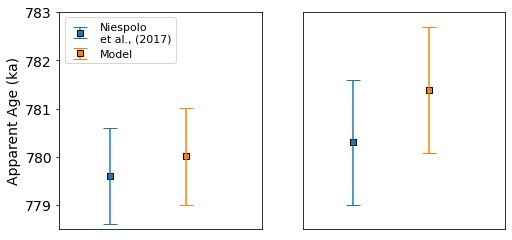

In [119]:
fig,ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].errorbar(1.5,y =  779.6, yerr = 1, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Niespolo\net al., (2017)', 
            markeredgecolor = 'k')

ax[0].errorbar(1.65, y = model_r_acs_mes4_mbb_1, 
             yerr = model_r_acs_mes4_mbb_1_err, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Model', 
            markeredgecolor = 'k')

ax[0].set_xlim(1.4, 1.8)
ax[0].set_xticks([])


ax[1].errorbar(1.5,y =  780.3, yerr = 1.3, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Niespolo\net al., (2017)', 
            markeredgecolor = 'k')


ax[1].errorbar(1.65, y = model_r_acs_mes4_mbb_2, 
             yerr = model_r_acs_mes4_mbb_2_err, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Model', 
            markeredgecolor = 'k')

ax[1].set_xlim(1.4, 1.8)
ax[1].set_xticks([])

ax[0].legend(fontsize = 11, loc =2)
ax[0].set_ylabel('Apparent Age (ka)')


ax[0].set_ylim(778.5, 783)
ax[1].set_ylim(778.5, 783)

ax[1].set_yticks([])

In [120]:
"""
FishCanyon
"""
kuiper_fcs = 28.201

model_fcs_acs= r_acs_fcs_niespolo 

t_fcs_age = (1/lamb_t)*np.log((np.exp(lamb_t*kuiper_fcs) -1)*(1/r_acs_fcs_niespolo)  + 1)


In [121]:
means = np.array([0.041704, 0.041740, 0.04177808])

err = np.array([0.041704*(0.003/100), 
               0.041740*(0.005/100),
                0.04177808*(0.009/100)])

In [122]:
weighted_mean = np.sum(err*means)/(np.sum(err))
weighted_mean_err = 1/(np.sum(1/err))

print(weighted_mean, 
      weighted_mean * (0.003/100))

0.041753826356795753 1.2526147907038727e-06


In [123]:
"""
Alder Creek w/ Kuiper
"""
kuiper_fcs = 28.201e6

model_fcs_acs = model_r_acs_fcs

lamb_t = 5.463e-10


t_acs_fcs_model = (1/lamb_t)*np.log((np.exp(lamb_t*kuiper_fcs) -1)*model_fcs_acs  + 1)

In [124]:
(t_acs_fcs_model/1e6)/1.1849

1.0002148130206798

In [125]:
"""
Alder Creek A1 age
"""
kuiper_a1  = 6.943e6

model_acs_a1 = 0.1707

t_ac_age_a1 = (1/lamb_t)*np.log((np.exp(lamb_t*kuiper_a1) -1)*model_acs_a1  + 1)

In [126]:
t_ac_age_a1/1e6

1.187035630176225

In [127]:
 t_acs_age/1e6

1.1847548062028033

In [128]:
print(t_acs_age/1e6, t_acs_fcs_model/1e6, t_ac_age_a1/1e6)

1.1847548062028033 1.1851545319482035 1.187035630176225


In [129]:
yerr = 0.0009* (t_acs_fcs_model/1e6)/1.1849
yerr

0.0009001933317186119

In [130]:
yerr = 0.0016* (t_ac_age_a1/1e6)/1.186
yerr

0.0016013971402040136

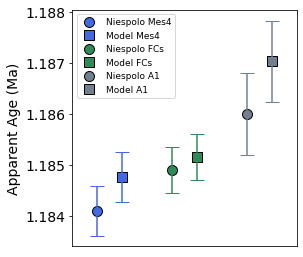

In [131]:
fig, ax = plt.subplots(1,1,figsize = (4.44,3.8))
ax.errorbar(1,y =  1.1841, yerr = 0.00098/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 'o', 
            label = 'Niespolo Mes4', 
            markeredgecolor = 'k', 
            color = 'RoyalBlue', 
            markersize = 10)

ax.errorbar(2, y = t_acs_age/1e6, yerr = (0.00098*1.0005)/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Model Mes4', 
            markeredgecolor = 'k', 
            color = 'RoyalBlue', 
            markersize = 10)


ax.errorbar(4, y = 1.1849, yerr = 0.0009/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 'o', 
            label = 'Niespolo FCs', 
            markeredgecolor = 'k', 
            color = 'Seagreen', 
            markersize = 10)

ax.errorbar(5, y = t_acs_fcs_model/1e6, yerr = (0.0009* (t_acs_fcs_model/1e6)/1.1849)/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Model FCs', 
            markeredgecolor = 'k', 
            color = 'Seagreen', 
            markersize = 10)


ax.errorbar(7, y = 1.186, yerr = 0.0016/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 'o', 
            label = 'Niespolo A1', 
            markeredgecolor = 'k',
            color = 'Slategrey', 
            markersize = 10)

ax.errorbar(8, y = t_ac_age_a1/1e6, yerr = 0.0016* ((t_ac_age_a1/1e6)/1.186)/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Model A1', 
            markeredgecolor = 'k',
            color = 'Slategrey', 
            markersize = 10)


# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]

ax.legend(handles, labels, 
            numpoints=1, ncol = 1, fontsize= 9)


ax.set_xlim(0, 9)
ax.set_xticks([])
ax.set_ylabel('Apparent Age (Ma)')
#ax.legend(loc = 2, fontsize = 9)
plt.tight_layout()
plt.savefig('/Users/jackcarter/Desktop/Neutron_Irradiation_Paper/Supplement/AC_age_all_corrections.pdf')

In [132]:
def weighted_mean()

SyntaxError: invalid syntax (<ipython-input-132-882ee88cee74>, line 1)

(0.03, 0.4)

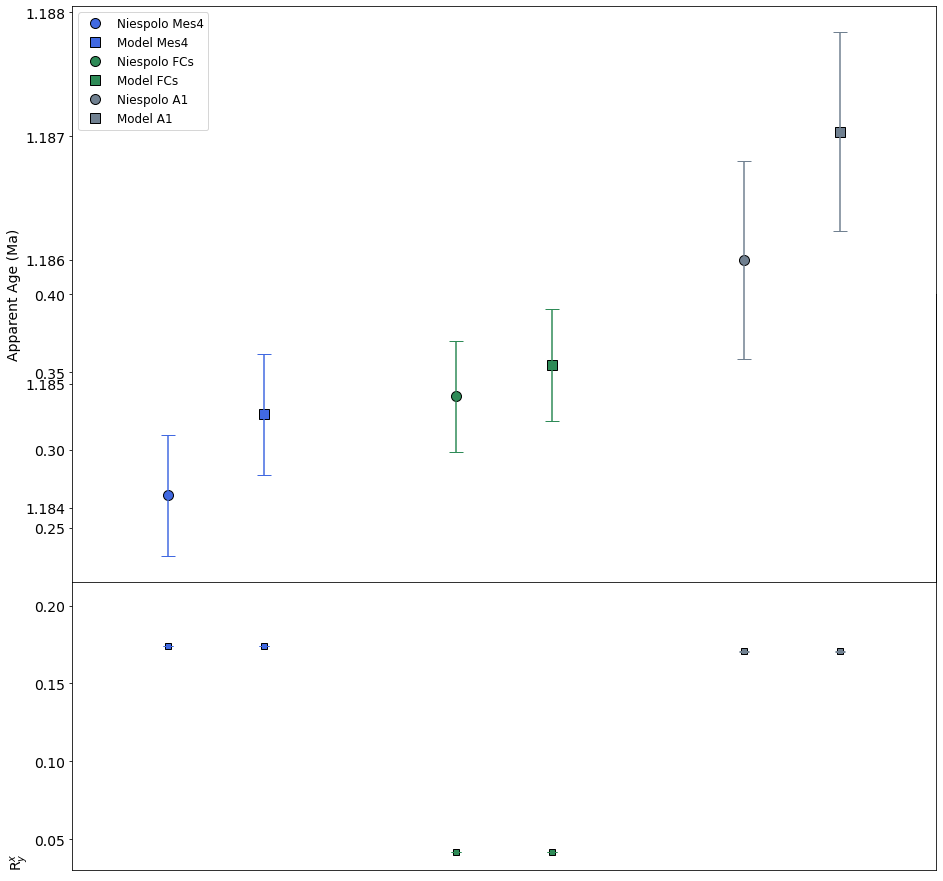

In [133]:
fig=plt.figure() 
  
# Creating two axes
# add_axes([xmin,ymin,dx,dy])
axes=fig.add_axes([0,0,2,2]) 
axes1=fig.add_axes([0,1,2,2])


axes1.errorbar(1,y =  1.1841, yerr = 0.00098/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 'o', 
            label = 'Niespolo Mes4', 
            markeredgecolor = 'k', 
            color = 'RoyalBlue', 
            markersize = 10)

axes1.errorbar(2, y = t_acs_age/1e6, yerr = (0.00098*1.0005)/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Model Mes4', 
            markeredgecolor = 'k', 
            color = 'RoyalBlue', 
            markersize = 10)


axes1.errorbar(4, y = 1.1849, yerr = 0.0009/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 'o', 
            label = 'Niespolo FCs', 
            markeredgecolor = 'k', 
            color = 'Seagreen', 
            markersize = 10)

axes1.errorbar(5, y = t_acs_fcs_model/1e6, yerr = (0.0009* (t_acs_fcs_model/1e6)/1.1849)/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Model FCs', 
            markeredgecolor = 'k', 
            color = 'Seagreen', 
            markersize = 10)


axes1.errorbar(7, y = 1.186, yerr = 0.0016/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 'o', 
            label = 'Niespolo A1', 
            markeredgecolor = 'k',
            color = 'Slategrey', 
            markersize = 10)

axes1.errorbar(8, y = t_ac_age_a1/1e6, yerr = 0.0016* ((t_ac_age_a1/1e6)/1.186)/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Model A1', 
            markeredgecolor = 'k',
            color = 'Slategrey', 
            markersize = 10)


# get handles
handles, labels = axes1.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]

axes1.legend(handles, labels, 
            numpoints=1, ncol = 1, fontsize= 12)


axes1.set_xlim(0, 9)
axes1.set_xticks([])
axes1.set_ylabel('Apparent Age (Ma)')


"""
0
"""

axes.errorbar(1, y = r_acs_mes4_niespolo, yerr =r_acs_mes4_niespolo_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'Niespolo Mes4', 
            color= 'RoyalBlue', 
            markeredgecolor = 'k')


axes.errorbar(2, y = model_val, 
             yerr = model_val_err, 
            fmt = 's', barsabove = True, capsize = 5, 
label = r'$^{39}$K(n,$\alpha$,$\beta$)$^{36}$Ar corrected', 
               color = 'RoyalBlue', 
            markeredgecolor = 'k')


"""
1
"""
axes.errorbar(4, y = r_acs_fcs_niespolo ,
             yerr =r_acs_fcs_niespolo_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'Niespolo\n et al., (2017)', 
            color= 'seagreen', 
            markeredgecolor = 'k')


axes.errorbar(5, y = model_r_acs_fcs, 
             yerr = model_r_acs_fcs_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'K correction\nincluded', 
            color = 'seagreen', 
            markeredgecolor = 'k')



"""
2
"""
axes.errorbar(7, y = r_acs_a1_niespolo ,
             yerr = r_acs_a1_niespolo_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            label = 'Niespolo', 
            color= 'slategrey', 
            markeredgecolor = 'k')


axes.errorbar(8, y = model_r_acs_a1, 
             yerr = model_r_acs_a1_err, 
            fmt = 's', barsabove = True, capsize = 5, 
            color = 'slategrey', 
            markeredgecolor = 'k')
axes.set_xlim(0,9)
axes.set_xticks([])
axes.set_ylabel('R$^{x}_{y}$', loc = 'bottom')

axes.set_ylim(0.03, 0.4)

#ax.legend(loc = 2, fontsize = 9)
#plt.tight_layout()

In [134]:
((t_acs_fcs_model/1e6)/1.1849)*100

100.02148130206798

In [135]:
def weighted_mean(a, a_err):
    
    z1 = (a * a_err**2).sum()
    z2 = (a_err**2).sum()
    
    z3 = (1/(1/a_err**2))
    return (z1/z2), z3.sum()

In [136]:
print(t_acs_age/1e6, t_acs_fcs_model/1e6, t_ac_age_a1/1e6)

1.1847548062028033 1.1851545319482035 1.187035630176225


In [137]:
model_ac_ages = np.array([t_acs_age/1e6, 
                          t_acs_fcs_model/1e6,
                          t_ac_age_a1/1e6])
model_ac_ages_err = np.array([(0.00098*1.0005)/2, 
                             (0.0009* (t_acs_fcs_model/1e6)/1.1849)/2, 
                             0.0016* ((t_ac_age_a1/1e6)/1.186)/2])
w_m, w_m_err = weighted_mean(model_ac_ages, model_ac_ages_err)

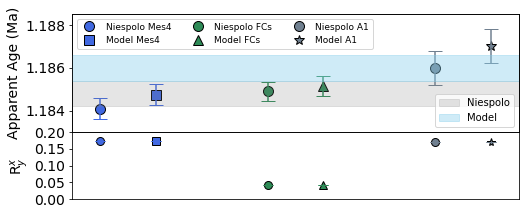

In [138]:
# Three subplots sharing both x/y axes
f, (axes1, axes) = plt.subplots(2, sharex=True, sharey=False, 
                                figsize = (8, 3.4), gridspec_kw={'height_ratios': [2.1, 1.2]})
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
axes1.errorbar(1,y =  1.1841, yerr = 0.00098/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 'o', 
            label = 'Niespolo Mes4', 
            markeredgecolor = 'k', 
            color = 'RoyalBlue', 
            markersize = 10)

axes1.errorbar(2, y = t_acs_age/1e6, yerr = (0.00098*1.0005)/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 's', 
            label = 'Model Mes4', 
            markeredgecolor = 'k', 
            color = 'RoyalBlue', 
            markersize = 10)


axes1.errorbar(4, y = 1.1849, yerr = 0.0009/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 'o', 
            label = 'Niespolo FCs', 
            markeredgecolor = 'k', 
            color = 'Seagreen', 
            markersize = 10)

axes1.errorbar(5, y = t_acs_fcs_model/1e6, yerr = (0.0009* (t_acs_fcs_model/1e6)/1.1849)/2, 
            capsize = 7, 
            barsabove = True,
            fmt = '^', 
            label = 'Model FCs', 
            markeredgecolor = 'k', 
            color = 'Seagreen', 
            markersize = 10)


axes1.errorbar(7, y = 1.186, yerr = 0.0016/2, 
            capsize = 7, 
            barsabove = True,
            fmt = 'o', 
            label = 'Niespolo A1', 
            markeredgecolor = 'k',
            color = 'Slategrey', 
            markersize = 10)

axes1.errorbar(8, y = t_ac_age_a1/1e6, yerr = 0.0016* ((t_ac_age_a1/1e6)/1.186)/2, 
            capsize = 7, 
            barsabove = True,
            fmt = '*', 
            label = 'Model A1', 
            markeredgecolor = 'k',
            color = 'Slategrey', 
            markersize = 10)


# get handles
handles, labels = axes1.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]

axes1.legend(handles, labels, 
            numpoints=1,  fontsize= 9, ncol = 3)


axes1.set_xlim(0, 9)
axes1.set_xticks([])
axes1.set_ylabel('Apparent Age (Ma)')


"""
0
"""

axes.errorbar(1, y = r_acs_mes4_niespolo, yerr =r_acs_mes4_niespolo_err, 
            fmt = 'o', barsabove = True, capsize = 5, 
            label = 'Niespolo Mes4', 
            color= 'RoyalBlue', 
            markeredgecolor = 'k', markersize = 8)


axes.errorbar(2, y = model_val, 
             yerr = model_val_err, 
            fmt = 's', barsabove = True, capsize = 5, 
label = r'$^{39}$K(n,$\alpha$,$\beta$)$^{36}$Ar corrected', 
               color = 'RoyalBlue', 
            markeredgecolor = 'k', markersize = 8)


"""
1
"""
axes.errorbar(4, y = r_acs_fcs_niespolo ,
             yerr =r_acs_fcs_niespolo_err, 
            fmt = 'o', barsabove = True, capsize = 5, 
            label = 'Niespolo\n et al., (2017)', 
            color= 'seagreen', 
            markeredgecolor = 'k', markersize = 8)


axes.errorbar(5, y = model_r_acs_fcs, 
             yerr = model_r_acs_fcs_err, 
            fmt = '^', barsabove = True, capsize = 5, 
            label = 'K correction\nincluded', 
            color = 'seagreen', 
            markeredgecolor = 'k', markersize = 8)



"""
2
"""
axes.errorbar(7, y = r_acs_a1_niespolo ,
             yerr = r_acs_a1_niespolo_err, 
            fmt = 'o', barsabove = True, capsize = 5, 
            label = 'Niespolo', 
            color= 'slategrey', 
            markeredgecolor = 'k', markersize = 8)


axes.errorbar(8, y = model_r_acs_a1, 
             yerr = model_r_acs_a1_err, 
            fmt = '*', barsabove = True, capsize = 5, 
            color = 'slategrey', 
            markeredgecolor = 'k', markersize = 8)
axes.set_xlim(0.5, 8.5)
axes.set_xticks([])
axes.set_ylabel('R$^{x}_{y}$')
#axes.set_yscale('log')
axes.set_ylim(0, 0.2)

axes2 = axes1.twinx()
axes2.axhspan(1.1848 - 0.0006, 
             1.1848 + 0.0006, 
             label = 'Niespolo', alpha = 0.2, 
             color = 'grey')

axes2.axhspan(1.186 - 0.0006, 
             1.186 + 0.0006, 
             label = 'Model', 
             alpha = 0.4, 
             color = 'skyblue')

axes2.set_ylim(1.183, 1.1885)
axes1.set_ylim(1.183, 1.1885)
axes2.legend(loc = 4, fontsize = 10)
axes2.set_yticks([])

axes.locator_params(axis = 'y', nbins = 4)
